# 实例：随机森林在乳腺癌数据上的调参

## 1.导入需要的库

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

## 2.导入数据集，探索数据

In [3]:
data =load_breast_cancer()
data.data.shape
#可以看到，乳腺癌数据集有569条记录，30个特征，单看维度虽然不算太高，但是样本量非常少。过拟合的情况可能存在。

(569, 30)

In [5]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

## 3.简单的建模尝试

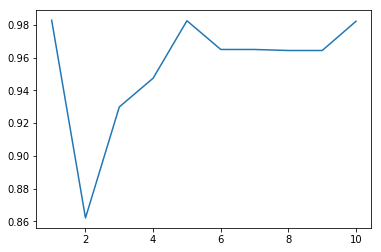

0.9545015556131708


In [17]:
rfc = RandomForestClassifier(n_estimators=30,random_state=100)
scores = cross_val_score(rfc,data.data,data.target,cv=10,scoring='accuracy')
plt.plot(range(1,11),scores)
plt.show()
print(scores.mean()) #初步来看，这个数据集还不错，未调参之前就已经达到95%了

## 4.随机森林调整的第一步：无论如何先来调n_estimators

"""
在这里我们选择学习曲线，可以使用网格搜索吗？可以，但是只有学习曲线，才能看见趋势
我个人的倾向是，要看见n_estimators在什么取值开始变得平稳，是否一直推动模型整体准确率的上升等信息
第一次的学习曲线，可以先用来帮助我们划定范围，我们取每十个数作为一个阶段，来观察n_estimators的变化如何
引起模型整体准确率的变化
"""

0.9615212600466684 61


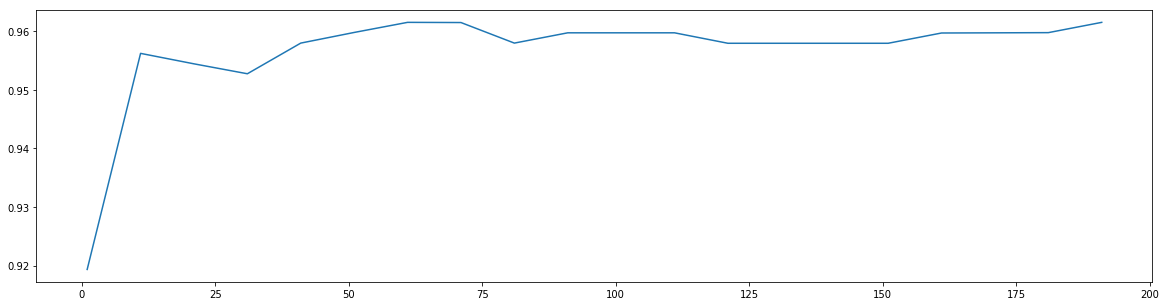

In [20]:
scorel=[]
for i in range(0,200,10):
    rfc  = RandomForestClassifier(n_estimators=i+1,n_jobs=-1,random_state=100)#n_jobs取-1表示用整个运行
    score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
    scorel.append(score)
print(max(scorel),scorel.index(max(scorel))*10+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.show() #运行完成后，看到大概在61-72区域平稳，且准确率最高

## 5.在确定好的范围内，进一步细化学习曲线

0.9667541699075274 64


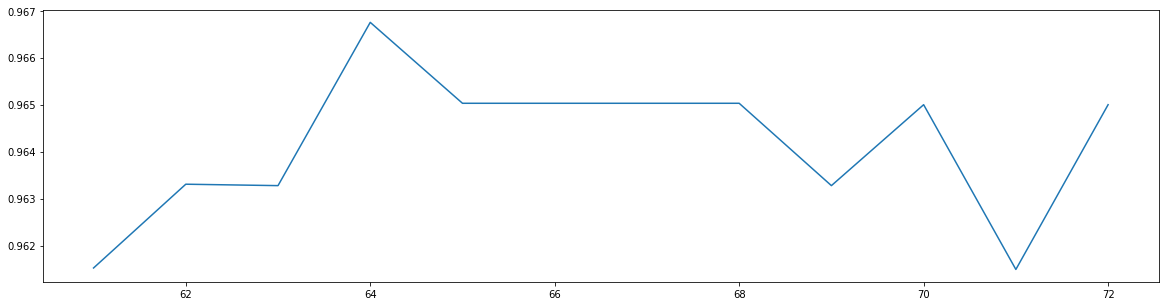

In [23]:
scorel = []
for i in range(61,73):
    rfc = RandomForestClassifier(n_estimators=i,random_state=100)
    score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
    scorel.append(score)
print(max(scorel),([*range(61,73)][scorel.index(max(scorel))]))
plt.figure(figsize=[20,5])
plt.plot(range(61,73),scorel)
plt.show()

"""
有一些参数是没有参照的，很难说清一个范围，这种情况下我们使用学习曲线，看趋势
从曲线跑出的结果中选取一个更小的区间，再跑曲线
param_grid = {'n_estimators':np.arange(0, 200, 10)}
param_grid = {'max_depth':np.arange(1, 20, 1)}
 
param_grid = {'max_leaf_nodes':np.arange(25,50,1)}
对于大型数据集，可以尝试从1000来构建，先输入1000，每100个叶子一个区间，再逐渐缩小范围
有一些参数是可以找到一个范围的，或者说我们知道他们的取值和随着他们的取值，模型的整体准确率会如何变化，这
样的参数我们就可以直接跑网格搜索
param_grid = {'criterion':['gini', 'entropy']}
param_grid = {'min_samples_split':np.arange(2, 2+20, 1)}
param_grid = {'min_samples_leaf':np.arange(1, 1+10, 1)}
param_grid = {'max_features':np.arange(5,30,1)}
"""

## 6.开始按照参数对模型整体准确率的影响程度进行调参，首先调整max_depth

In [25]:
param_grid = {'max_depth':np.arange(1, 20, 1)}
rfc = RandomForestClassifier(n_estimators=64,random_state=100)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)
GS.best_params_

D:\develop\Anaconda3\envs\python37\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_depth': 10}

In [26]:
GS.best_score_ #我们注意到，将max_depth设置为有限之后，模型的准确率下降了。限制max_depth，是让模型变得简单，把模型向左推，而模型整体的准确率下降了

0.9666080843585237

## 7.调整min_samples_leaf

In [27]:
param_grid={'min_samples_leaf':np.arange(1, 1+10, 1)}
rfc = RandomForestClassifier(n_estimators=64,random_state=100)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)
GS.best_params_

D:\develop\Anaconda3\envs\python37\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'min_samples_leaf': 1}

In [28]:
GS.best_score_ #没啥改变就别给他设置值

0.9666080843585237

## 8.调整min_samples_split

In [29]:
param_grid={'min_samples_split':np.arange(2, 2+20, 1)}
rfc = RandomForestClassifier(n_estimators=64,random_state=100)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)
GS.best_params_

D:\develop\Anaconda3\envs\python37\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'min_samples_split': 2}

In [30]:
GS.best_score_ #没啥改变就别给他设置值

0.9666080843585237

## 9.调整criterion

In [31]:
param_grid = {'criterion':['gini', 'entropy']}
rfc = RandomForestClassifier(n_estimators=64,random_state=100)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)
GS.best_params_

{'criterion': 'gini'}

In [32]:
GS.best_score_

0.9666080843585237